# **Functional API**

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense, concatenate
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링 : Sequential API vs Function API

In [8]:
nfeatures = x_train.shape[1]
nfeatures

18

### (1) Sequential

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423 (1.65 KB)

 Trainable params: 423 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

### (2) Functional

In [ ]:
clear_session()

il = Input(shape=(nfeatures, ))
hl1 = Dense(18, activation='relu')(il)
hl2 = Dense(4, activation='relu')(hl1)
ol = Dense(1)(hl2)

model = Model(inputs = il, outputs = ol)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423 (1.65 KB)

 Trainable params: 423 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

hist = model.fit(x_train, y_train, epochs = 50, validation_split= 0.2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 67.3595 - val_loss: 41.1497
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 38.2388 - val_loss: 18.5237
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.5538 - val_loss: 12.9361
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9802 - val_loss: 13.0197
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4797 - val_loss: 9.5966
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5765 - val_loss: 9.1386
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7220 - val_loss: 9.1344
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.5353 - val_loss: 9.1183
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0084 - val_loss: 8.1852
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.4886 - val_loss: 7.9435
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2715 - val_loss: 7.7837
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0161 - val_loss: 

* 학습곡선

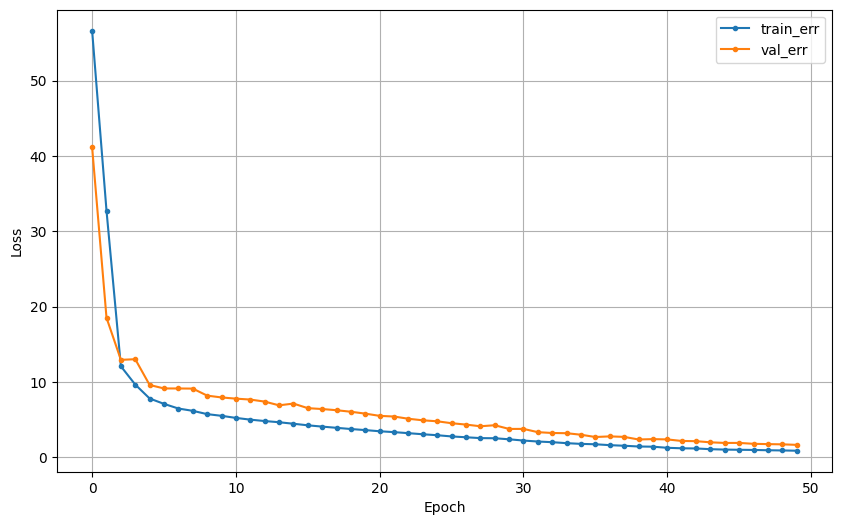

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred = model.predict(x_val)

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.322466169720507
1.0283449157476425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (3) 실습1
다음의 Sequential API 코드를 Functional API로 변환해서 수행해 봅시다.

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
clear_session()

il = Input(shape=(nfeatures, ))
hl1 = Dense(18, activation='relu')(il)
hl2 = Dense(4, activation='relu')(hl1)
hl3 = Dense(4, activation='relu')(hl2)
ol = Dense(1)(hl3)

model = Model(inputs = il, outputs = ol)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

### (4) 실습2
다음 구조로 모델링 하시오. 단 Functional API 로 코딩하시오.

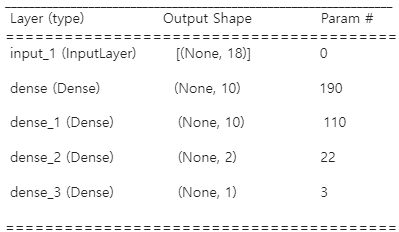

In [ ]:
clear_session()

il = Input(shape=(nfeatures, ))
hl1 = Dense(10, activation='relu')(il)
hl2 = Dense(10, activation='relu')(hl1)
hl3 = Dense(2, activation='relu')(hl2)
ol = Dense(1)(hl3)

model = Model(inputs = il, outputs = ol)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              22 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

## 4.다중 입력


### (1) 입력 준비

* 아래 코드는 다중 입력 모델을 연습하기 위해 임의로 변수를 구분
* 성능과 상관없이 다중 입력 연습을 위한 것입니다.

#### 1) 기본 전처리

In [9]:
# 데이터 분할 : x, y
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [10]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,US_Yes,Urban_Yes
0,0.387755,0.767677,0.172414,0.248497,0.402685,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.204082,0.252525,0.379310,0.515030,0.557047,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.520408,0.454545,0.103448,0.967936,0.637584,0.363636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.234694,0.333333,0.310345,0.847695,0.436242,0.363636,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.673469,1.000000,0.241379,0.539078,0.825503,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2) 입력 나누기

* 입력1 : 판매 관련 정보 : Advertising, Price, ShelveLoc, US, Urban, CompPrice
* 입력2 : 외부 환경 정보 : Income, Population, Age, Education


In [11]:
# 입력1
in_col = ['Advertising','Price','CompPrice','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_Yes']
x_train1 = x_train[in_col]
x_val1 = x_val[in_col]
x_val1.head()

,Advertising,Price,CompPrice,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,0.310345,0.510067,0.448980,0.0,0.0,1.0,0.0
1,0.655172,0.651007,0.448980,0.0,1.0,1.0,1.0
2,0.241379,0.630872,0.551020,0.0,1.0,1.0,1.0
3,0.206897,0.731544,0.540816,0.0,0.0,1.0,1.0
4,0.000000,0.563758,0.500000,0.0,0.0,0.0,1.0


In [12]:
# 입력2
x_train2 = x_train.drop(in_col, axis = 1)
x_val2 = x_val.drop(in_col, axis = 1)
x_val2.head()

,Income,Population,Age,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.575758,0.280561,0.018182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070707,0.611222,0.745455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.262626,0.160321,0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.070707,0.801603,0.854545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.777778,0.326653,0.545455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### (2) 다중 입력 모델링

In [13]:
nfeatures1 = x_train1.shape[1]
nfeatures2 = x_train2.shape[1]

print(nfeatures1, nfeatures2)

7 11


In [14]:
# 모델 구성
input_1 = Input(shape=(nfeatures1,), name='input_1')
input_2 = Input(shape=(nfeatures2,), name='input_2')

# 첫 번째 입력을 위한 레이어
hl1_1 = Dense(10, activation='relu')(input_1)

# 두 번째 입력을 위한 레이어
hl1_2 = Dense(20, activation='relu')(input_2)

# 두 히든레이어 결합
cbl = concatenate([hl1_1, hl1_2])

# 추가 히든레이어
hl2 = Dense(8, activation='relu')(cbl)

# 출력 레이어
output = Dense(1)(hl2)

# 모델 선언
model = Model(inputs = [input_1, input_2], outputs = output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_2 (InputLayer)      │ (None, 11)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 10)             │             80 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 20)             │            240 │ input_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 30)             │              0 │ dense[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 8)              │            248 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │              9 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 컴파일
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

# 학습
hist = model.fit([x_train1, x_train2], y_train, epochs=50, validation_split=.2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 49.8182 - val_loss: 24.0626
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2294 - val_loss: 13.2055
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.5274 - val_loss: 12.4746
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8727 - val_loss: 10.0971
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2245 - val_loss: 9.4746
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5262 - val_loss: 9.6751
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5819 - val_loss: 8.9940
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4970 - val_loss: 8.1883
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0746 - val_loss: 8.1504
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7086 - val_loss: 7.6276
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2961 - val_loss: 7.0909
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1665 - val_loss: 6.8627
Epoch

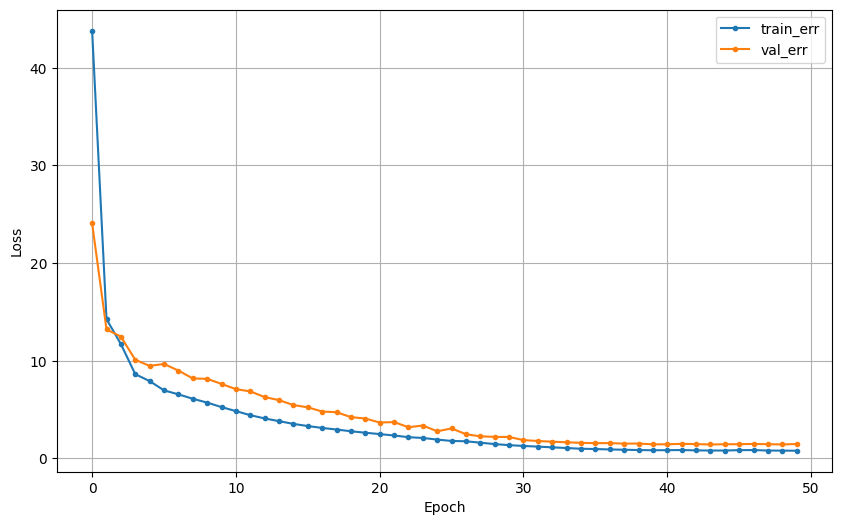

In [16]:
dl_history_plot(hist)

* 검증

In [20]:
pred = model.predict([x_val1, x_val2])

print(root_mean_squared_error(y_val, pred))
# print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1.2710343390254037
1.0777891396284103


## 5.실습

* 보스턴 집값 데이터를 이용해서 입력을 2개로 나누고 모델링을 수행하시오.
* 입력을 나눌 때, 임의로 나눠도 좋고, 어떠한 관점을 가지고 나눠도 좋습니다.



![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율 |
|	indus	|	산업단지 면적비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	고속도로 진입로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


### (1) 데이터 준비

* 데이터 로딩

In [21]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 기본 전처리

In [22]:
# 데이터 분할 : x, y
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [23]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.001880,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,0.480684
1,0.007265,0.200,0.128666,0.0,0.390947,0.748994,0.511843,0.158445,0.173913,0.146947,0.042553,0.039459
2,0.000473,0.250,0.161290,0.0,0.084362,0.606630,0.315139,0.388391,0.130435,0.179389,0.680851,0.098234
3,0.015293,0.000,0.281525,0.0,0.314815,0.412340,0.939238,0.282207,0.130435,0.229008,0.893617,0.575883
4,0.091277,0.000,0.646628,0.0,0.674897,0.610845,0.923790,0.108576,1.000000,0.914122,0.808511,0.433499


### (2) 입력 나누기

In [24]:
# 입력1 : 주택과 직접 관련이 있는 변수들
in_col = ['zn', 'rm', 'age', 'tax']
x_train1 = x_train[in_col]
x_val1 = x_val[in_col]
x_val1.head()

,zn,rm,age,tax
0,0.00,0.470971,0.642636,0.389313
1,0.28,0.515041,0.766220,0.158397
2,0.00,0.490707,0.972194,0.412214
3,0.00,0.498755,0.910402,0.229008
4,0.00,0.487066,0.846550,0.914122


In [25]:
# 입력2 : 주택과 간접 관련이 있는 변수들
x_train2 = x_train.drop(in_col, axis = 1)
x_val2 = x_val.drop(in_col, axis = 1)
x_val2.head()

,crim,indus,chas,nox,dis,rad,ptratio,lstat
0,0.003166,0.338343,0.0,0.411523,0.116351,0.217391,0.702128,0.308775
1,0.000498,0.534457,0.0,0.162551,0.226009,0.130435,0.595745,0.244481
2,0.022444,0.700880,0.0,1.000000,0.044413,0.173913,0.223404,0.341336
3,0.005459,0.210411,1.0,0.251029,0.174449,0.304348,0.510638,0.544426
4,0.095802,0.646628,0.0,0.471193,0.081132,1.000000,0.808511,0.594923


### (3) 다중 입력 모델링

* 모델 선언

In [26]:
nfeatures1 = x_train1.shape[1]
nfeatures2 = x_train2.shape[1]

In [31]:
# 입력
input_1 = Input(shape=(nfeatures1,), name='input_1')
input_2 = Input(shape=(nfeatures2,), name='input_2')

# 첫 번째 입력을 위한 레이어
hl1_1 = Dense(10, activation='relu')(input_1)
hl1_2 = Dense(20, activation='relu')(input_2)

# 두 히든레이어 결합
cbl = concatenate([hl1_1, hl1_2])

# 추가 히든레이어
hl2 = Dense(12, activation='relu')(cbl)
hl3 = Dense(8, activation='relu')(hl2)

# 출력 레이어
output = Dense(1)(hl3)

# 모델 선언
model = Model(inputs = [input_1, input_2], outputs = output)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 4)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_2 (InputLayer)      │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 10)             │             50 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 20)             │            180 │ input_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 30)             │              0 │ dense_9[0][0],         │
│ (Concatenate)             │                        │                │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 12)             │            372 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 8)              │            104 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1)              │              9 │ dense_12[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 715 (2.79 KB)

 Trainable params: 715 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

* 컴파일 및 학습

In [32]:
# 컴파일
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

# 학습
hist = model.fit([x_train1, x_train2], y_train, epochs=50, validation_split=.2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 577.0625 - val_loss: 478.1006
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 379.2693 - val_loss: 173.8320
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165.8236 - val_loss: 130.5241
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114.0320 - val_loss: 97.0442
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77.1367 - val_loss: 76.8319
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.6033 - val_loss: 67.8718
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76.1899 - val_loss: 59.2614
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.4123 - val_loss: 54.1361
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 65.8642 - val_loss: 50.9326
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.1405 - val_loss: 47.1047
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 53.1356 - val_loss: 43.5782
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8

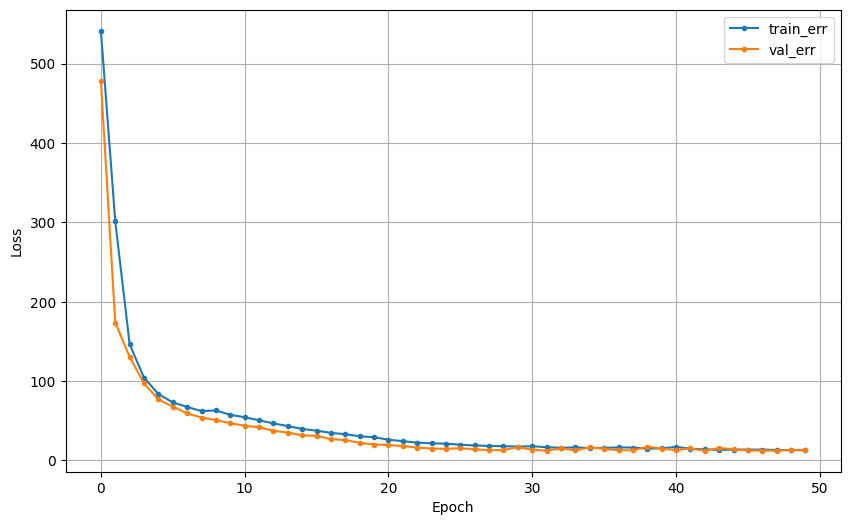

In [33]:
# 학습곡선 확인
dl_history_plot(hist)

* 검증

In [30]:
pred = model.predict([x_val1, x_val2])

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4.455122181550831
3.5068905288097914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
